In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')
# 호칭만 했을 때 캐글 스코어 0.75 --> Cabin유무 0.77
# http://hleecaster.com/python-matplotlib-pie-chart/

# https://cyc1am3n.github.io/2018/10/09/my-first-kaggle-competition_titanic.html
# https://cyc1am3n.github.io/2018/10/09/my-first-kaggle-competition_titanic.html

In [2]:
train = pd.read_csv('./train.csv')
test= pd.read_csv('./test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.describe()

#https://chancoding.tistory.com/66

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.shape

(891, 12)

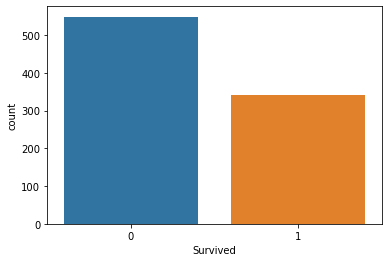

In [6]:
sns.countplot(data=train, x='Survived')

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
for col in train.columns:
    temp = train[col].isnull()
    print(col,list(temp).count(True))

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2


In [9]:
train['Cabin'] = train[['Cabin']].notnull().astype('int')

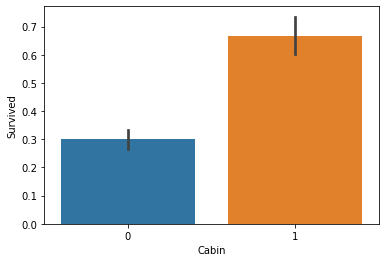

In [80]:
sns.barplot(data=train,x='Cabin',y='Survived')

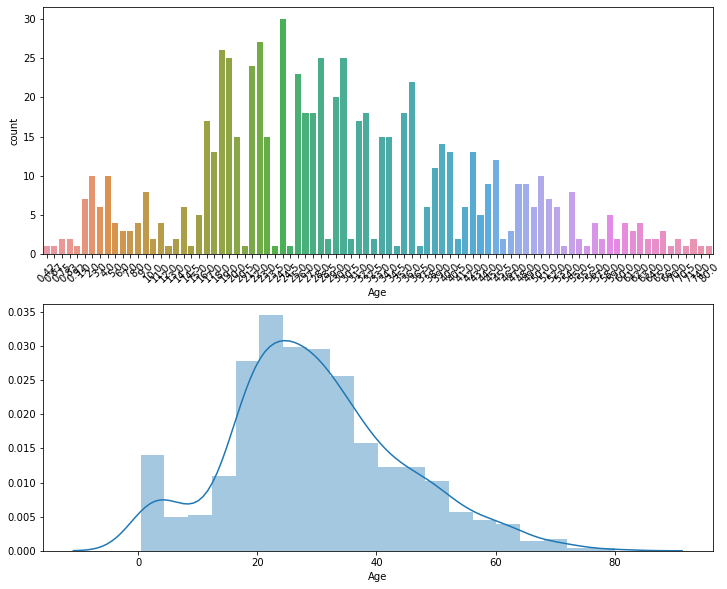

In [11]:
fig,ax = plt.subplots(2,1,figsize=(12,5))
fig.set_size_inches(12,10)

plt.sca(ax[0])
plt.xticks(rotation=45)
sns.countplot(data=train,x='Age')

plt.sca(ax[1])
sns.distplot(train['Age'])

In [12]:
age_mode = float(train['Age'].mode())
print(age_mode)



24.0


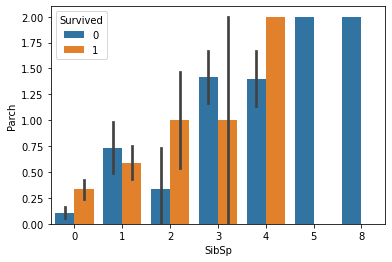

In [13]:
sns.barplot(data=train,x='SibSp',y='Parch',hue='Survived')

In [14]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.019919
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.316912
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.725541
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.249732
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.040460
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.036987
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.482075
Cabin,0.019919,0.316912,-0.725541,0.249732,-0.040460,0.036987,0.482075,1.000000


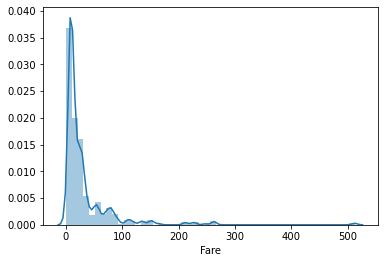

In [15]:
#sns.countplot(data=train,x='Fare',hue='Survived')
sns.distplot(train['Fare'])

In [16]:
train[['Fare']].describe()
temp = train[['Fare']]
####### 외우기 ###
#temp_msk = temp[(temp['Fare']>200) | (temp['Fare']==0)].index.values
#print(temp_msk)
#train = train.drop(temp_msk,axis=0)
#train.info()

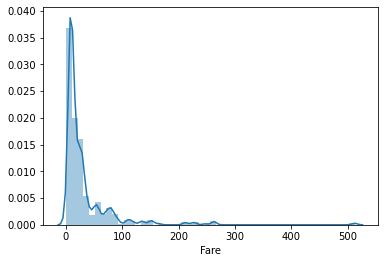

In [17]:
sns.distplot(train['Fare'])

In [18]:
#### 외우기 ###
#temp_msk = temp[(temp['Fare']>200) | (temp['Fare']==0)].index.values
#print(temp_msk)
#test = test.drop(temp_msk,axis=0)
#test.info()
#test['log_Fare'] = np.log(test['Fare'])


In [19]:
#train['Pclass']
#sns.barplot(data=train,x='Pclass',y='log_Fare',hue='Survived')

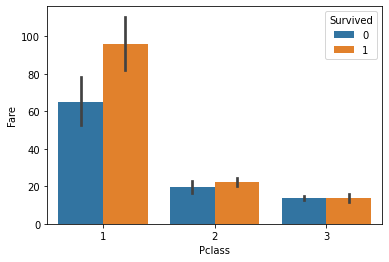

In [20]:
sns.barplot(data=train,x='Pclass',y='Fare',hue='Survived')
# 0 = No, 1 = Yes
# Fare 가 높을 수록 살아남는 확률이 높은 것을 볼 수 있음

In [21]:
train[['Age']].isnull().sum()

Age    177
dtype: int64

In [22]:
msk_m = train['Sex']=='male'
msk_f = train['Sex']=='female'
train['Sex'][msk_m]= 0 
train['Sex'][msk_f]=1


msk_m = test['Sex']=='male'
msk_f = test['Sex']=='female'
test['Sex'][msk_m]= 0 
test['Sex'][msk_f]=1
test['Sex']

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex, Length: 418, dtype: object

In [23]:
import missingno as msno
msk = train['Embarked'].isnull()
temp = train['Embarked'].mode().values[0]
train['Embarked'][msk]=temp
train['Embarked'].isnull().sum()

0

In [24]:
#Counter(train['Embarked'])
msk_S = train['Embarked']=='S'
msk_C = train['Embarked']=='C'
msk_Q = train['Embarked']=='Q'
train['Embarked'][msk_S] = 0
train['Embarked'][msk_C] = 1
train['Embarked'][msk_Q] = 2
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,0,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,1,1


In [25]:
train[['Embarked']]

,Embarked
0,0
1,1
2,0
3,0
4,0
...,...
886,0
887,0
888,0
889,1


In [26]:
# 호칭 전처리

# https://predictors.tistory.com/3

###  'Age' null 값 채우기, Pclass, SibSp, Fare 이용

In [27]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

def rmse(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.

    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = predicted_values - actual_values
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmse)
#정답에 대한 오류를 숫자로 나타낸 값으로 값이 클수록 오차가 크다는 의미다.
# 출처 : https://programmers.co.kr/learn/courses/21/lessons/943

In [28]:
np.square(np.array([1,2,3]))

array([1, 4, 9])

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
k_fold=KFold(n_splits=10, shuffle=True, random_state=0)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

In [137]:
train_not_null = train[train.Age.notnull()]
train_null = train[train.Age.isnull()]




feature_names=['Pclass','SibSp','Fare','Sex','Cabin']
X_train=train_not_null[feature_names]
X_test = train_not_null[feature_names]

label = 'Age'
y_train = train_not_null['Age']

In [138]:
k_fold=KFold(n_splits=10, random_state=0, shuffle=True)

In [139]:
score= cross_val_score(model, X_train,y_train, cv=k_fold, scoring = rmsle_scorer)
print(score)
score.mean()


[13.22658324 13.68959352 15.1624458  11.68795457 13.76461816 11.91329256
 13.09113145 15.05695061 12.59185784 15.15381367]


13.533824141595414

In [140]:
train_not_null = train[train.Age.notnull()]
train_null = train[train.Age.isnull()]



feature_names=['Pclass','SibSp','Sex','Fare','Cabin']
X_train=train_not_null[feature_names]
X_test = train_null[feature_names]

label = 'Age'
y_train = train_not_null['Age']

In [141]:
k_fold=KFold(n_splits=10, random_state=0, shuffle=True)

In [142]:
score= cross_val_score(model, X_train,y_train, cv=k_fold, scoring = rmsle_scorer)
print(score)
score.mean()


[13.43394002 13.79814659 14.9866874  11.68335933 14.10534173 11.99165851
 13.16330399 14.9776408  12.40855603 14.80683504]


13.53554694398361

In [31]:
def test_features_pred_target(df,feature_names,target):
    train_not_null = df[df[target].notnull()]
    train_null = df[df[target].isnull()]
    X_train=train_not_null[feature_names]
    X_test = train_null[feature_names]
    label = target
    y_train = train_not_null['Age']
    k_fold=KFold(n_splits=10, random_state=0, shuffle=True)
    model = RandomForestRegressor(n_estimators=100, n_jobs=1, random_state = 0)


    score= cross_val_score(model, X_train,y_train, cv=k_fold, scoring = rmsle_scorer)
    print(score.mean())
    model.fit(X_train,y_train)
    model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0)
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
    train_target= df.copy()
    train_target[target][df[target].isnull()]=predictions
    train_target[target].isnull().sum()
    
    train_target = df.copy()
    train_target[target][df[target].isnull()]=predictions
    print('Check whether null is treated')
    print(train_target[target].isnull().sum())
    
    fig,ax = plt.subplots(2,2,figsize=(12,5))
    fig.set_size_inches(12,10)

    plt.sca(ax[0][0])
    plt.xticks(rotation=45)
    sns.countplot(data=df,x=target)
    plt.sca(ax[0][1])
    plt.xticks(rotation=45)
    sns.countplot(data=train_target,x=target)




    plt.sca(ax[1][0])
    sns.distplot(df[target],bins=30)
    plt.sca(ax[1][1])
    plt.xticks(rotation=45)
    sns.distplot(train_target[target],bins=30)


    return train_target

In [32]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,0,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,1,1


13.20441227661598
Check whether null is treated
0


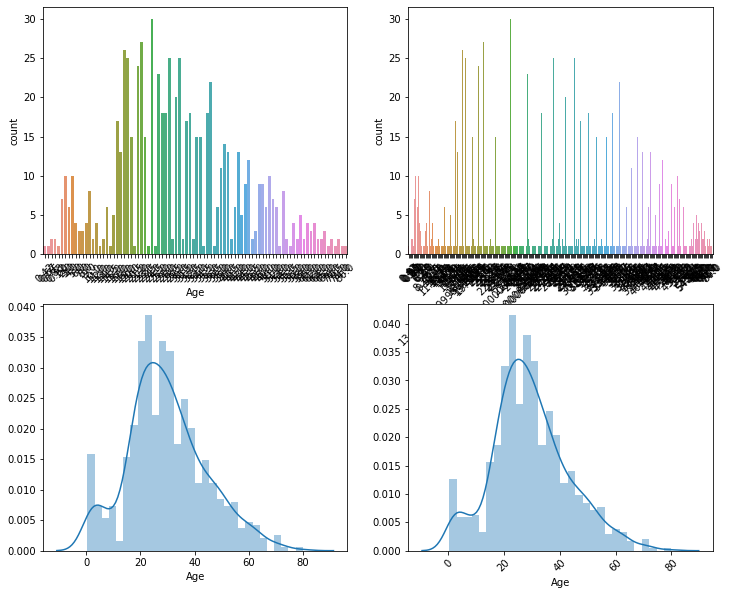

In [33]:
feature_names=['PassengerId']
feature_names=['Pclass','SibSp','Sex','Fare','Survived','PassengerId']
#feature_names=['Name_1']
train_proc1 = test_features_pred_target(train,feature_names,'Age')


In [34]:
train['Cabin']

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Cabin, Length: 891, dtype: int64

In [35]:
## 호칭 전처리

train['Name_1']=train['Name'].str.replace('.',',')
train['Name_1']= train['Name_1'].str.split(',')
train['Name_1'] = [x[1].strip() for x in train['Name_1'].values]
from collections import Counter
Counter(train['Name_1'])


Counter({'Mr': 517,
         'Mrs': 125,
         'Miss': 182,
         'Master': 40,
         'Don': 1,
         'Rev': 6,
         'Dr': 7,
         'Mme': 1,
         'Ms': 1,
         'Major': 2,
         'Lady': 1,
         'Sir': 1,
         'Mlle': 2,
         'Col': 2,
         'Capt': 1,
         'the Countess': 1,
         'Jonkheer': 1})

In [36]:
 # https://predictors.tistory.com/3

#Mlle는 네이버 사전에 검색해보면 영애, 아가씨라는 뜻으로 Miss에 해당한다고 합니다. 
 
# Major는 프랑스어사전으로 남성명사로 의미를 지닌다고 하고 영어로는 남자이름?을 뜻한다고 되어있습니다.
# master : mr 라고 불리기에 아직 어린 남성의 호칭

msk_to_miss = (train['Name_1']=='Mlle')|(train['Name_1']=='Ms')
msk_to_mrs = (train['Name_1']=='Mme')|(train['Name_1']=='Lady')|(train['Name_1']=='the Countess')
msk_to_mr = (train['Name_1']=='Major')|(train['Name_1']=='Col')|(train['Name_1']=='Sir')|(train['Name_1']=='Don')
msk_to_mr = msk_to_mr|(train['Name_1']=='Mlle')|(train['Name_1']=='Capt')#|(train['Name_1']=='Master')


train['Name_1'][msk_to_miss] = 'Miss'
train['Name_1'][msk_to_mrs] = 'Mrs'
train['Name_1'][msk_to_mr] = 'Mr'
Counter(train["Name_1"])

Counter({'Mr': 526,
         'Mrs': 128,
         'Miss': 183,
         'Master': 40,
         'Rev': 6,
         'Dr': 7,
         'Jonkheer': 1})

In [37]:
test['Name_1']=test['Name'].str.replace('.',',')
test['Name_1']= test['Name_1'].str.split(',')
test['Name_1'] = [x[1].strip() for x in test['Name_1'].values]
from collections import Counter
Counter(test['Name_1'])

Counter({'Mr': 240,
         'Mrs': 72,
         'Miss': 78,
         'Master': 21,
         'Ms': 1,
         'Col': 2,
         'Rev': 2,
         'Dr': 1,
         'Dona': 1})

In [38]:
msk_to_miss = (test['Name_1']=='Mlle')|(test['Name_1']=='Ms')
msk_to_mrs = (test['Name_1']=='Mme')|(test['Name_1']=='Lady')|(test['Name_1']=='the Countess')
msk_to_mr = (test['Name_1']=='Major')|(test['Name_1']=='Col')|(test['Name_1']=='Sir')|(test['Name_1']=='Don')
msk_to_mr = msk_to_mr|(test['Name_1']=='Mlle')|(test['Name_1']=='Capt')#|(test['Name_1']=='Master')


test['Name_1'][msk_to_miss] = 'Miss'
test['Name_1'][msk_to_mrs] = 'Mrs'
test['Name_1'][msk_to_mr] = 'Mr'
Counter(test["Name_1"])

Counter({'Mr': 242,
         'Mrs': 72,
         'Miss': 79,
         'Master': 21,
         'Rev': 2,
         'Dr': 1,
         'Dona': 1})

In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Name_1       418 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


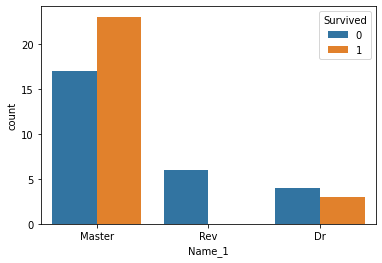

In [40]:
temp = train[(train['Name_1']=='Rev')|(train['Name_1']=='Dr')|(train['Name_1']=='Master')]
sns.countplot(data=temp, x='Name_1', hue='Survived')

In [41]:
train = pd.get_dummies(train,columns=['Name_1'])
test = pd.get_dummies(test,columns=['Name_1'])


In [42]:
train['Cabin']

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Cabin, Length: 891, dtype: int64

11.96060355803339
Check whether null is treated
0


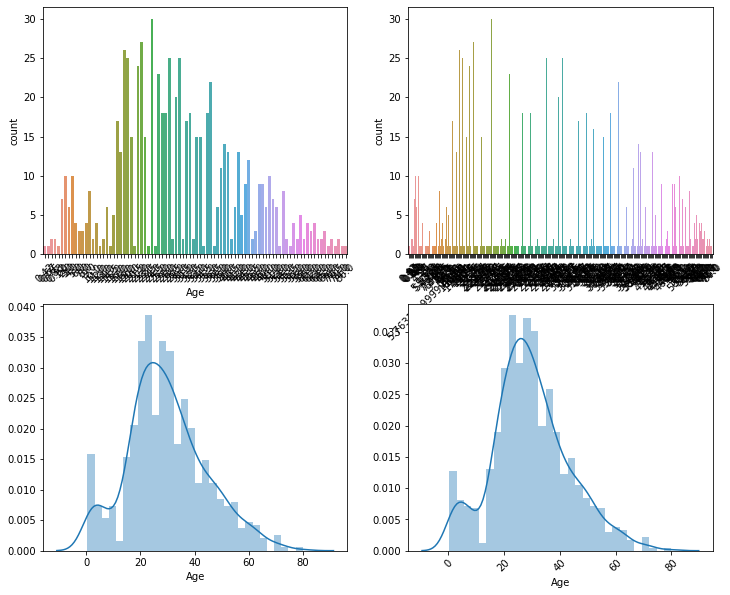

In [43]:
feature_names=['PassengerId']
feature_names=['Pclass','SibSp','Sex','Fare','PassengerId', 'Name_1_Dr',
       'Name_1_Miss', 'Name_1_Mr', 'Name_1_Mrs', 'Name_1_Rev','Name_1_Master','Cabin']

train_proc1 = test_features_pred_target(train,feature_names,'Age')

In [44]:
train_proc1['Cabin']

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Cabin, Length: 891, dtype: int64

In [45]:
display(train[['Age']].describe())
display(train_proc1[['Age']].describe())



,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


,Age
count,891.000000
mean,29.620116
std,13.816166
min,0.420000
25%,21.000000
50%,28.000000
75%,37.127500
max,80.000000


In [46]:
##test set 전처리
test[['Age']].describe()
test['Age'].isnull().sum()

86

In [47]:
test['Cabin'] = test['Cabin'].notnull().astype('int')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    418 non-null    int64  
 1   Pclass         418 non-null    int64  
 2   Name           418 non-null    object 
 3   Sex            418 non-null    object 
 4   Age            332 non-null    float64
 5   SibSp          418 non-null    int64  
 6   Parch          418 non-null    int64  
 7   Ticket         418 non-null    object 
 8   Fare           417 non-null    float64
 9   Cabin          418 non-null    int64  
 10  Embarked       418 non-null    object 
 11  Name_1_Dona    418 non-null    uint8  
 12  Name_1_Dr      418 non-null    uint8  
 13  Name_1_Master  418 non-null    uint8  
 14  Name_1_Miss    418 non-null    uint8  
 15  Name_1_Mr      418 non-null    uint8  
 16  Name_1_Mrs     418 non-null    uint8  
 17  Name_1_Rev     418 non-null    uint8  
dtypes: float64

In [48]:
mean = test['Fare'].mean()
test['Fare'][test.Fare.isnull()] = mean
#test['log_Fare'][test.log_Fare.isnull()] = np.log(mean)
#test['Fare'].isnull().sum()

In [49]:
test[feature_names].isnull().sum()

Pclass           0
SibSp            0
Sex              0
Fare             0
PassengerId      0
Name_1_Dr        0
Name_1_Miss      0
Name_1_Mr        0
Name_1_Mrs       0
Name_1_Rev       0
Name_1_Master    0
Cabin            0
dtype: int64

11.814137754559118
Check whether null is treated
0


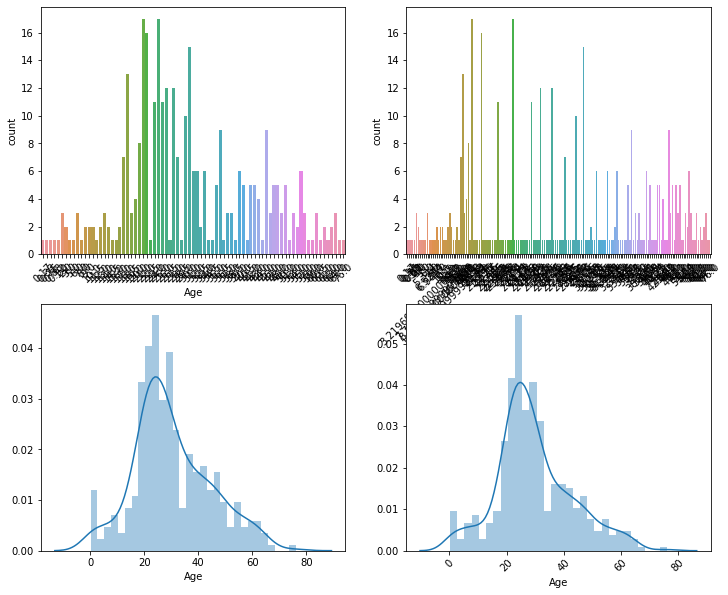

In [50]:
test_proc1 = test_features_pred_target(test,feature_names,'Age')
## 처음 시도보다 RMSE score 가 3점 정도 ㄴㅏㅈ아졌고, distplot 도 훨씬 비슷해졌다. 

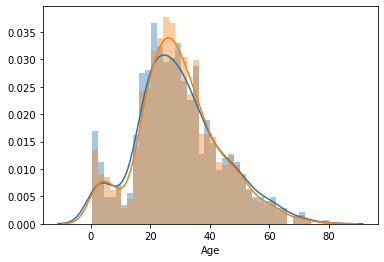

In [51]:
sns.distplot(train['Age'],bins=40)
sns.distplot(train_proc1['Age'],bins=40)

In [52]:
test_proc1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_1_Dona,Name_1_Dr,Name_1_Master,Name_1_Miss,Name_1_Mr,Name_1_Mrs,Name_1_Rev
0,892,3,"Kelly, Mr. James",0,34.5000,0,0,330911,7.8292,0,Q,0,0,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0000,1,0,363272,7.0000,0,S,0,0,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0000,0,0,240276,9.6875,0,Q,0,0,0,0,1,0,0
3,895,3,"Wirz, Mr. Albert",0,27.0000,0,0,315154,8.6625,0,S,0,0,0,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0000,1,1,3101298,12.2875,0,S,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,30.5450,0,0,A.5. 3236,8.0500,0,S,0,0,0,0,1,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0000,0,0,PC 17758,108.9000,1,C,1,0,0,0,0,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5000,0,0,SOTON/O.Q. 3101262,7.2500,0,S,0,0,0,0,1,0,0
416,1308,3,"Ware, Mr. Frederick",0,30.5450,0,0,359309,8.0500,0,S,0,0,0,0,1,0,0


In [166]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name_1_Dr',
       'Name_1_Jonkheer', 'Name_1_Master', 'Name_1_Miss', 'Name_1_Mr',
       'Name_1_Mrs', 'Name_1_Rev'],
      dtype='object')

In [53]:
train_proc1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_1_Dr,Name_1_Jonkheer,Name_1_Master,Name_1_Miss,Name_1_Mr,Name_1_Mrs,Name_1_Rev
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,0,0,0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,0,0,0,0,1,0,0


In [178]:
train_proc1.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Name_1_Dr', 'Name_1_Master', 'Name_1_Miss', 'Name_1_Mr',
       'Name_1_Mrs', 'Name_1_Rev', 'Survived'],
      dtype='object')

In [54]:
train_proc1 = train_proc1[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'Name_1_Dr',
       'Name_1_Master', 'Name_1_Miss', 'Name_1_Mr', 'Name_1_Mrs',
       'Name_1_Rev','Survived','Cabin']]
test_proc1 = test_proc1[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'Name_1_Dr',
       'Name_1_Master', 'Name_1_Miss', 'Name_1_Mr', 'Name_1_Mrs',
       'Name_1_Rev','Cabin']]



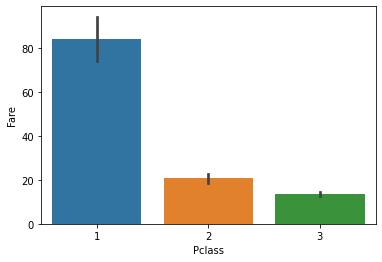

In [55]:
sns.barplot(data=train_proc1,x='Pclass',y='Fare')

##### 1class가 가장 좋은 등급임을 예측할 수 있음

In [56]:
train_proc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Sex            891 non-null    object 
 3   Age            891 non-null    float64
 4   SibSp          891 non-null    int64  
 5   Parch          891 non-null    int64  
 6   Fare           891 non-null    float64
 7   Embarked       891 non-null    object 
 8   Name_1_Dr      891 non-null    uint8  
 9   Name_1_Master  891 non-null    uint8  
 10  Name_1_Miss    891 non-null    uint8  
 11  Name_1_Mr      891 non-null    uint8  
 12  Name_1_Mrs     891 non-null    uint8  
 13  Name_1_Rev     891 non-null    uint8  
 14  Survived       891 non-null    int64  
 15  Cabin          891 non-null    int64  
dtypes: float64(2), int64(6), object(2), uint8(6)
memory usage: 75.0+ KB


In [57]:
category_names=['Embarked']
int_names = ['Sex','Name_1_Dr',
       'Name_1_Master', 'Name_1_Miss', 'Name_1_Mr', 'Name_1_Mrs',
       'Name_1_Rev']
conti_names = []
Train = train_proc1.copy()
Test = test_proc1.copy()
for ctgry in category_names:
    Train[ctgry]=train_proc1[ctgry].astype('category')
    try: Test[ctgry] = test_proc1[ctgry].astype('category')
    except: Train = Train.drop(ctgry,axis=1)
        
for col in int_names:
    Train[col]=train_proc1[col].astype('int')
    try: Test[col] = test_proc1[col].astype('int')
    except: Train = Train.drop(col,axis=1)

for col in conti_names:
    Train[col]=train_proc1[col].astype('float64')
    try: Test[col] = test_proc1[col].astype('float64')
    except: Train = Train.drop(col,axis=1)

        
        

Train['Survived']=Train['Survived'].astype('int')

In [58]:
print(Train.info())
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Sex            891 non-null    int64   
 3   Age            891 non-null    float64 
 4   SibSp          891 non-null    int64   
 5   Parch          891 non-null    int64   
 6   Fare           891 non-null    float64 
 7   Embarked       891 non-null    category
 8   Name_1_Dr      891 non-null    int64   
 9   Name_1_Master  891 non-null    int64   
 10  Name_1_Miss    891 non-null    int64   
 11  Name_1_Mr      891 non-null    int64   
 12  Name_1_Mrs     891 non-null    int64   
 13  Name_1_Rev     891 non-null    int64   
 14  Survived       891 non-null    int64   
 15  Cabin          891 non-null    int64   
dtypes: category(1), float64(2), int64(13)
memory usage: 105.5 KB
None
<class 'pandas

In [59]:
train_proc1['Sex'] = train_proc1['Sex'].astype('int')
test_proc1['Sex'] = test_proc1['Sex'].astype('int')

In [60]:
Train = pd.get_dummies(train_proc1)
Test = pd.get_dummies(test_proc1)

In [61]:
train_y=Train['Survived']
train_X= Train.drop('Survived',axis=1)
test_X = Test

In [62]:
test_X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Name_1_Dr,Name_1_Master,Name_1_Miss,Name_1_Mr,Name_1_Mrs,Name_1_Rev,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,34.5000,0,0,7.8292,0,0,0,1,0,0,0,0,1,0
1,893,3,1,47.0000,1,0,7.0000,0,0,0,0,1,0,0,0,0,1
2,894,2,0,62.0000,0,0,9.6875,0,0,0,1,0,0,0,0,1,0
3,895,3,0,27.0000,0,0,8.6625,0,0,0,1,0,0,0,0,0,1
4,896,3,1,22.0000,1,1,12.2875,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,30.5450,0,0,8.0500,0,0,0,1,0,0,0,0,0,1
414,1306,1,1,39.0000,0,0,108.9000,0,0,0,0,0,0,1,1,0,0
415,1307,3,0,38.5000,0,0,7.2500,0,0,0,1,0,0,0,0,0,1
416,1308,3,0,30.5450,0,0,8.0500,0,0,0,1,0,0,0,0,0,1


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
#from xgboost import XGBClassifier



In [64]:
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

In [65]:
def mscore(predict,actual):
    difference= abs(np.array(predict)-np.array(actual)).sum()
    score =difference/len(predict)
    return score
score = make_scorer(rmse)

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
k_fold= KFold(n_splits=10, shuffle=True, random_state=0)


In [68]:
Models= [LogisticRegression(),SVC(),KNeighborsClassifier(),RandomForestClassifier(),GaussianNB()]

In [69]:
import warnings
warnings.filterwarnings('ignore')
for i in range(5):
    model = Models[i]
    scores=cross_val_score(model, train_X, train_y,cv=k_fold)#,scoring=score)
    mean = scores.mean()
    print(str(model))
    print('{}'.format(mean,'.2f'))
    scores.mean()


LogisticRegression()
0.8192883895131088
SVC()
0.6565917602996255
KNeighborsClassifier()
0.6330711610486891
RandomForestClassifier()
0.8271285892634207
GaussianNB()
0.7732459425717852


In [70]:
model =RandomForestClassifier()
model.fit(train_X, train_y)

RandomForestClassifier()

In [71]:
print(test_X.columns)
print(train_X.columns)

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Name_1_Dr', 'Name_1_Master', 'Name_1_Miss', 'Name_1_Mr', 'Name_1_Mrs',
       'Name_1_Rev', 'Cabin', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Name_1_Dr', 'Name_1_Master', 'Name_1_Miss', 'Name_1_Mr', 'Name_1_Mrs',
       'Name_1_Rev', 'Cabin', 'Embarked_0', 'Embarked_1', 'Embarked_2'],
      dtype='object')


In [72]:
predict_survive = model.predict(test_X)

In [73]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    418 non-null    int64  
 1   Pclass         418 non-null    int64  
 2   Sex            418 non-null    int64  
 3   Age            418 non-null    float64
 4   SibSp          418 non-null    int64  
 5   Parch          418 non-null    int64  
 6   Fare           418 non-null    float64
 7   Name_1_Dr      418 non-null    uint8  
 8   Name_1_Master  418 non-null    uint8  
 9   Name_1_Miss    418 non-null    uint8  
 10  Name_1_Mr      418 non-null    uint8  
 11  Name_1_Mrs     418 non-null    uint8  
 12  Name_1_Rev     418 non-null    uint8  
 13  Cabin          418 non-null    int64  
 14  Embarked_C     418 non-null    uint8  
 15  Embarked_Q     418 non-null    uint8  
 16  Embarked_S     418 non-null    uint8  
dtypes: float64(2), int64(6), uint8(9)
memory usage: 29.9 K

In [74]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": predict_survive
})

display(submission)
submission.to_csv('submission_rf.csv', index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [75]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
train_data['Age']

In [ ]:
import pandas as pd


In [ ]:
pd.Series([1,2,3])==pd.Series([3,2,1])

In [ ]:
import re
p= r'\w+'
re.findall(p,'i love you so much')

In [ ]:
print('{}'.format(3.14235235,'.2f'))

In [ ]:
mean=2.1231241
print('asdfasd{2f}'.format(mean))

